# CME 193 - Lecture 6 - Pandas

Pandas is a package for working with tabular data

# Pandas

[Pandas](https://pandas.pydata.org/) is a Python library for dealing with data.  The main thing you'll hear people talk about is the DataFrame object (inspired by R), which is designed to hold tabular data.

## Difference between a DataFrame and NumPy Array

Pandas DataFrames and NumPy arrays both have similarities to Python lists.  
* Numpy arrays are designed to contain data of one type (e.g. Int, Float, ...)
* DataFrames can contain different types of data (Int, Float, String, ...)
    * Usually each column has the same type
    
    
Both arrays and DataFrames are optimized for storage/performance beyond Python lists

Pandas is also powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

## Key Features

* File I/O - integrations with multiple file formats
* Working with missing data (.dropna(), pd.isnull())
* Normal table operations: merging and joining, groupby functionality, reshaping via stack, and pivot_tables,
* Time series-specific functionality:
    * date range generation and frequency conversion, moving window statistics/regressions, date shifting and lagging, etc.
* Built in Matplotlib integration

## Other Strengths

* Strong community, support, and documentation
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

## Python/Pandas vs. R

* R is a language dedicated to statistics. Python is a general-purpose language with statistics modules.
* R has more statistical analysis features than Python, and specialized syntaxes.

However, when it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of Python is an invaluable asset.

# Getting Started

[Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is a link to the documentation for DataFrames

In [1]:
import pandas as pd
import numpy as np

## Objects and Basic Creation

| Name | Dimensions | Description  |
| ------:| -----------:|----------|
| ```pd.Series``` | 1 | 1D labeled homogeneously-typed array |
| ```pd.DataFrame```  | 2| General 2D labeled, size-mutable tabular structure |
| ```pd.Panel``` | 3|  General 3D labeled, also size-mutable array |

# Series
## What are they?
- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
- Basic method to create a series: 
```python 
s = pd.Series(data, index = index) ```
- Data Can be many things:
    * A Python Dictionary
    * An ndarray (or reg. list)
    * A scalar 
- The passed index is a list of axis labels (which varies on what data is)

Think "Series = Vector + labels"

In [2]:
first_series = pd.Series([1,2,4,8,16,32,64])
print(type(first_series))
print(first_series)

<class 'pandas.core.series.Series'>
0     1
1     2
2     4
3     8
4    16
5    32
6    64
dtype: int64


In [3]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print('-'*50)
print(s.index)

a   -0.613940
b    0.132063
c    0.245530
d   -0.914435
e   -0.947327
dtype: float64
--------------------------------------------------
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


If Data is a dictionary, if index is passed the values in data corresponding to the labels in the index will be pulled out, otherwise an index will be constructed from the sorted keys of the dict

In [4]:
d = {'a': [0., 0], 'b': {'1':1.}, 'c':2.}
pd.Series(d)

a      [0.0, 0]
b    {'1': 1.0}
c             2
dtype: object

You can create a series from a scalar, but need to specify indices

In [5]:
pd.Series(5, index=['a', 'b', 'c'])

a    5
b    5
c    5
dtype: int64

You can index and slice series like you would numpy arrays/python lists

In [6]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    0.407973
b   -0.749300
c    0.055232
d   -0.206192
e   -0.290433
dtype: float64


In [7]:
end_string = '\n' + '#'*50 + '\n'
print(s[0], end=end_string)
# slicing
print(s[:3], end=end_string)

0.4079734038505838
##################################################
a    0.407973
b   -0.749300
c    0.055232
dtype: float64
##################################################


In [8]:
end_string = '\n' + '-'*50 + '\n'
print(s[0], end=end_string)
# slicing
print(s[:3], end=end_string)

0.4079734038505838
--------------------------------------------------
a    0.407973
b   -0.749300
c    0.055232
dtype: float64
--------------------------------------------------


In [9]:
# Is the s element greater then the average of s?
s > s.mean()

a     True
b    False
c     True
d    False
e    False
dtype: bool

In [10]:
# conditional max - index with booleans
print(s[s > s.mean()], end=end_string)
# elementwise function - vectorization
print(np.exp(s), end=end_string)

a    0.407973
c    0.055232
dtype: float64
--------------------------------------------------
a    1.503767
b    0.472697
c    1.056785
d    0.813677
e    0.747939
dtype: float64
--------------------------------------------------


Series are also like dictionaries - you can access values using index labels

In [11]:
print(s, end=end_string)
print(s['a'], end=end_string)

a    0.407973
b   -0.749300
c    0.055232
d   -0.206192
e   -0.290433
dtype: float64
--------------------------------------------------
0.4079734038505838
--------------------------------------------------


In [12]:
s['e'] = 12  # set element using index label
print(s, end=end_string)
print('f' in s, end=end_string)  # check for index label
print(s.get('f', None), end=end_string)  # get item with index 'f' - if no such item return None
print(s.get('e', None), end=end_string)

a     0.407973
b    -0.749300
c     0.055232
d    -0.206192
e    12.000000
dtype: float64
--------------------------------------------------
False
--------------------------------------------------
None
--------------------------------------------------
12.0
--------------------------------------------------


### Series Attributes:

- Get the index : 
```python 
s.index ``` 
- Get the values :
``` python 
s.values ``` 
- Find the shape : 
``` python 
s.shape ``` 

In [13]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [14]:
s.values

array([ 0.4079734 , -0.74929999,  0.05523153, -0.20619202, 12.        ])

In [15]:
s.shape

(5,)

### Series Iteration

In [16]:
for idx, val in s.iteritems():
    print(idx, val)

a 0.4079734038505838
b -0.7492999860038042
c 0.055231529271400175
d -0.20619202024989827
e 12.0


Sort by index or by value

In [17]:
print(s.sort_values(), end=end_string)
print(s.sort_index(), end=end_string)

b    -0.749300
d    -0.206192
c     0.055232
a     0.407973
e    12.000000
dtype: float64
--------------------------------------------------
a     0.407973
b    -0.749300
c     0.055232
d    -0.206192
e    12.000000
dtype: float64
--------------------------------------------------


Find counts of unique values

In [18]:
s = pd.Series([0,0,0,1,1,1,2,2,2,2])
sct = s.value_counts()
print(sct)

2    4
1    3
0    3
dtype: int64


You can do just about anything you can do with a numpy array

- Series.mean()
- Series.median()
- Series.mode()
- Series.nsmallest(num)
- Series.max ...

In [19]:
print(s.min(), end=end_string)
print(s.max(), end=end_string)
print(s.mean(), end=end_string)
print(s.median(), end=end_string)
print(s.nsmallest(2), end=end_string)

0
--------------------------------------------------
2
--------------------------------------------------
1.1
--------------------------------------------------
1.0
--------------------------------------------------
0    0
1    0
dtype: int64
--------------------------------------------------


## Exercise

- Consider the series `s` of letters in a sentence.
- What is count of each letter in the sentence, output a series which is sorted by the count
- Create a list with only the top 5 common letters (not including space)

In [20]:
s = pd.Series(list("Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index."))

In [21]:
s

0      S
1      e
2      r
3      i
4      e
      ..
195    n
196    d
197    e
198    x
199    .
Length: 200, dtype: object

In [22]:
# Series sorted by count
sct = s.value_counts()
sct

     29
e    23
a    15
n    12
i    12
t    12
s    11
l    11
o    10
r    10
d     6
y     5
c     5
b     5
g     4
h     4
,     4
.     3
f     3
p     3
x     2
m     2
P     1
u     1
-     1
j     1
(     1
T     1
v     1
)     1
S     1
dtype: int64

In [23]:
# list with the 5 most common letters
sct_5 = []
for idx, val in sct.iteritems():
    if idx != ' ':
        sct_5.append(idx)   
        if len(sct_5) == 5:
            break
print(sct_5)

['e', 'a', 'n', 'i', 't']


In [24]:
s1 = s.value_counts()
s1[s1.index!=' '].sort_values(ascending=False)[:5]

e    23
a    15
n    12
i    12
t    12
dtype: int64

# DataFrame
- DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.
- You can create a DataFrame from:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D numpy array
    - A list of dictionaries
    - A Series
    - Another Dataframe
``` python
df = pd.DataFrame(data, index = index, columns = columns)
```
- ```index```/ ``` columns ``` is a list of the row/ column labels. If you pass an index and/ or columns, you are guarenteeing the index and /or column of the df. 
- If you do not pass anything in, the input will be constructed by "common sense" rules

[**pandas.DataFrame**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

# DataFrame Creation From dict of series or dicts
- The index of the resulting DataFrame will be the union of the indices of the various Series. If there are any nested dicts, these will be first converted to Series. 
- If no columns are passed, the columns will be the sorted list of dict keys.

In [25]:
# Create a dictionary of series
d = {'one': pd.Series([1,2,3], index = ['a', 'b', 'c']),
     'two': pd.Series(list(range(4)), index = ['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
print(df, end = end_string)

d = {'one': {'a': 1, 'b': 2, 'c': 3},
     'two': pd.Series(list(range(4)), index = ['a', 'b', 'c', 'd'])}
# Columns are dictionary keys, indices and values obtained from series
df = pd.DataFrame(d)
# Notice how it fills the column one with NaN for d
print(df, end = end_string)

   one  two
a  1.0    0
b  2.0    1
c  3.0    2
d  NaN    3
--------------------------------------------------
   one  two
a  1.0    0
b  2.0    1
c  3.0    2
d  NaN    3
--------------------------------------------------


In [26]:
d = {'one': pd.Series([1,2,3], index = ['a', 'b', 'c']),
     'two': pd.Series(list(range(4)), index = ['a', 'b', 'c', 'd'])}

print(pd.DataFrame(d, index = ['d', 'b', 'a']), end = end_string)
print(pd.DataFrame(d, index = ['d', 'b', 'a'], columns = ['two', 'three']), 
      end = end_string)

   one  two
d  NaN    3
b  2.0    1
a  1.0    0
--------------------------------------------------
   two three
d    3   NaN
b    1   NaN
a    0   NaN
--------------------------------------------------


# From dict of ndarray / lists
- The ndarrays must all be the same length. 
- If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [27]:
d = {'one': [1., 2., 3., 4.], 'two': [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


# From a list of dicts

In [28]:
data = []
for i in range(100):
    # dictionary comprehesion!
    data += [{'Column' + str(j):np.random.randint(100) for j in range(5)}]

data[:5]

[{'Column0': 14, 'Column1': 87, 'Column2': 12, 'Column3': 59, 'Column4': 65},
 {'Column0': 84, 'Column1': 1, 'Column2': 49, 'Column3': 28, 'Column4': 81},
 {'Column0': 66, 'Column1': 87, 'Column2': 68, 'Column3': 57, 'Column4': 35},
 {'Column0': 94, 'Column1': 1, 'Column2': 91, 'Column3': 64, 'Column4': 2},
 {'Column0': 64, 'Column1': 5, 'Column2': 9, 'Column3': 36, 'Column4': 22}]

In [29]:
# Creating DF from a list of dicts
df = pd.DataFrame(data)
print(df.head(), end = end_string)

   Column0  Column1  Column2  Column3  Column4
0       14       87       12       59       65
1       84        1       49       28       81
2       66       87       68       57       35
3       94        1       91       64        2
4       64        5        9       36       22
--------------------------------------------------


In [30]:
# Only certain columns
df = pd.DataFrame(data, columns = ['Column0', 'Column1'])
df.head()

,Column0,Column1
0,14,87
1,84,1
2,66,87
3,94,1
4,64,5


## Attributes

- ``` df.index ``` : the row index of df
- ``` df.columns ``` : the columns of df
- ``` df.shape ``` : the shape of the df
- ``` df.values ``` : numpy array of values

In [31]:
# Adding and accessing columns
d = {'one': pd.Series([1,2,3], index = ['a', 'b', 'c']),
     'two': pd.Series(range(4), index = ['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
# Multiply
df['three'] = df['one'] * df['two']
# Create a boolean flag
df['flag'] = df['one'] > 2
print(df.head())

   one  two  three   flag
a  1.0    0    0.0  False
b  2.0    1    2.0  False
c  3.0    2    6.0   True
d  NaN    3    NaN  False


In [32]:
# Inserting column in specified location, with values
df.insert(1, 'bar', df['one'][:2])
print(df.head())

   one  bar  two  three   flag
a  1.0  1.0    0    0.0  False
b  2.0  2.0    1    2.0  False
c  3.0  NaN    2    6.0   True
d  NaN  NaN    3    NaN  False


In [33]:
# Deleting Columns
three = df.pop('three')
print(df.head(), end = end_string)
# Propagation of values
df['foo'] = 'bar'
print(df, end = end_string)

   one  bar  two   flag
a  1.0  1.0    0  False
b  2.0  2.0    1  False
c  3.0  NaN    2   True
d  NaN  NaN    3  False
--------------------------------------------------
   one  bar  two   flag  foo
a  1.0  1.0    0  False  bar
b  2.0  2.0    1  False  bar
c  3.0  NaN    2   True  bar
d  NaN  NaN    3  False  bar
--------------------------------------------------


## Indexing and Selection 

- 4 methods ``` [], ix, iloc, loc ```

| Operation  | Syntax       | Result | 
|----|----------------------| ---------------------------|
| Select Column | df[col]   |    Series                      |
| Select Row by Label | df.loc[label] | Series  |
| Select Row by Integer Location | df.iloc[idx] |      Series                    |
| Slice rows | df[5:10]        |                        DataFrame  | 
| Select rows by boolean | df[mask]   | DataFrame        |

- Note all the operations below are valid on series as well restricted to one dimension

## Simplest form Of Indexing: []
- Series: selecting a label: s[label] 
- DataFrame: selection single or multiple columns: 
``` python 
df['col'] or df[['col1', 'col2']] ``` 
- DataFrame: slicing the rows:
``` python
df['rowlabel1': 'rowlabel2'] ``` 
or 
``` python 
df[boolean_mask] ``` 

In [34]:
# Lets create a data frame
pd.options.display.max_rows = 4
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-2.246257,-0.147745,0.437539,-0.393630
2000-01-02,-0.416962,-0.094917,-0.834606,1.037657
...,...,...,...,...
2000-01-07,-0.876070,-1.197996,-0.397876,-0.690007
2000-01-08,0.727799,-1.133347,0.951447,-1.068666


In [35]:
# column 'A'
df['A']

2000-01-01   -2.246257
2000-01-02   -0.416962
                ...   
2000-01-07   -0.876070
2000-01-08    0.727799
Freq: D, Name: A, Length: 8, dtype: float64

In [36]:
df.loc[:, "A": "C"]

,A,B,C
2000-01-01,-2.246257,-0.147745,0.437539
2000-01-02,-0.416962,-0.094917,-0.834606
...,...,...,...
2000-01-07,-0.876070,-1.197996,-0.397876
2000-01-08,0.727799,-1.133347,0.951447


In [37]:
# multiple column
df[['A', 'C']]

,A,C
2000-01-01,-2.246257,0.437539
2000-01-02,-0.416962,-0.834606
...,...,...
2000-01-07,-0.876070,-0.397876
2000-01-08,0.727799,0.951447


In [38]:
# Slice by rows
df['2000-01-01': '2000-01-04']

,A,B,C,D
2000-01-01,-2.246257,-0.147745,0.437539,-0.393630
2000-01-02,-0.416962,-0.094917,-0.834606,1.037657
2000-01-03,0.966946,0.888586,0.393820,-0.183356
2000-01-04,-1.258104,1.243639,0.502093,-0.512468


In [39]:
# boolean mask
df[df['A'] > df['B']].head()

,A,B,C,D
2000-01-03,0.966946,0.888586,0.393820,-0.183356
2000-01-05,0.695028,-1.799254,0.154750,1.839588
2000-01-07,-0.876070,-1.197996,-0.397876,-0.690007
2000-01-08,0.727799,-1.133347,0.951447,-1.068666


In [40]:
# Assign via []
df['A'] = df['B'].values
df.head()

,A,B,C,D
2000-01-01,-0.147745,-0.147745,0.437539,-0.393630
2000-01-02,-0.094917,-0.094917,-0.834606,1.037657
...,...,...,...,...
2000-01-04,1.243639,1.243639,0.502093,-0.512468
2000-01-05,-1.799254,-1.799254,0.154750,1.839588


In [41]:
# Access a column by df.colname
df.A

2000-01-01   -0.147745
2000-01-02   -0.094917
                ...   
2000-01-07   -1.197996
2000-01-08   -1.133347
Freq: D, Name: A, Length: 8, dtype: float64

## Selecting by label .loc

- is primarily label based, but may also be used with a boolean array.
- .loc will raise KeyError when the items are not found
- Allowed inputs:
    1. A single label 
    2. A list of labels
    3. A boolean array

In [42]:
# Selections by label .loc
df.loc['2000-01-01']

A   -0.147745
B   -0.147745
C    0.437539
D   -0.393630
Name: 2000-01-01 00:00:00, dtype: float64

In [43]:
df.loc[:, 'A':'C']

,A,B,C
2000-01-01,-0.147745,-0.147745,0.437539
2000-01-02,-0.094917,-0.094917,-0.834606
...,...,...,...
2000-01-07,-1.197996,-1.197996,-0.397876
2000-01-08,-1.133347,-1.133347,0.951447


In [44]:
# Get the columns for which value > 0 on a certain day, get all rows
df.loc[:, df.loc['2000-01-01'] > 0]

,C
2000-01-01,0.437539
2000-01-02,-0.834606
...,...
2000-01-07,-0.397876
2000-01-08,0.951447


In [45]:
# Get the columns for which value > 0 on a certain day, get all rows
df.loc[:, df.loc['2000-01-01'] > 0.6]

""
2000-01-01
2000-01-02
...
2000-01-07
2000-01-08


## Selecting by position 

- The .iloc attribute is the primary access method. The following are valid input:
    - An integer
    - A list of integers
    - A slice 
    - A boolean array

In [46]:
df1 = pd.DataFrame(np.random.randn(6,4),
                   index=list(range(0,12,2)),
                   columns=list(range(0,12,3)))
df1

,0,3,6,9
0,-1.069370,0.450361,-1.564699,1.737786
2,1.640652,-0.901340,-0.964246,-0.105012
...,...,...,...,...
8,1.023036,0.475047,0.535194,-1.125360
10,-0.954464,-2.401230,0.255046,-0.307656


In [47]:
# rows 0-2
df1.iloc[:3]

,0,3,6,9
0,-1.069370,0.450361,-1.564699,1.737786
2,1.640652,-0.901340,-0.964246,-0.105012
4,0.323247,-0.721785,-0.283144,1.464308


In [48]:
# rows 1:4 and columns 2:4
df1.iloc[1:5, 2:4]

,6,9
2,-0.964246,-0.105012
4,-0.283144,1.464308
6,0.907132,1.686594
8,0.535194,-1.125360


In [49]:
# select via integer list
df1.iloc[[1,3,5], [1,3]]

,3,9
2,-0.901340,-0.105012
6,1.468914,1.686594
10,-2.401230,-0.307656


In [50]:
# selecting via integer mask
boolean_mask = df1.iloc[:, 1] > 0.0
df1.iloc[boolean_mask.values, 1]

0    0.450361
6    1.468914
8    0.475047
Name: 3, dtype: float64

### 2. Exercise

Given the dataframe, find the following
- Last two rows of columns A and D
- Last three rows such which statisfy that column A > Column B

In [51]:
# df
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-1.503507,-0.896096,-1.800679,0.715178
2000-01-02,0.595909,-1.319157,1.041301,-0.420999
...,...,...,...,...
2000-01-07,-0.638226,0.681235,-0.305267,0.607890
2000-01-08,1.127803,-0.816359,0.840465,1.305700


In [52]:
df[['A', 'D']].iloc[-2:]

,A,D
2000-01-07,-0.638226,0.60789
2000-01-08,1.127803,1.30570


In [53]:
df.loc[df['A'] > df['B'], :].iloc[-3:]

,A,B,C,D
2000-01-03,1.501593,-0.828865,-0.092537,0.574740
2000-01-06,0.135258,-0.273086,0.613667,0.337359
2000-01-08,1.127803,-0.816359,0.840465,1.305700


# Merging DataFrames

- Pandas has full-featured, very high performance, in memory join operations that are very similar to SQL and R 

- The documentation is https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

- Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects: 
``` python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True) ```


In [54]:
# Example of merge
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [4, 2]})
right = pd.DataFrame({'key': ['bar', 'zoo'], 'rval': [4, 5]})

print("left: ", left, "right: ", right, sep=end_string)

left: 
--------------------------------------------------
   key  lval
0  foo     4
1  bar     2
--------------------------------------------------
right: 
--------------------------------------------------
   key  rval
0  bar     4
1  zoo     5


In [55]:
merged = pd.merge(left, right, how="inner")
print(merged)

   key  lval  rval
0  bar     2     4


In [56]:
merged = pd.merge(left, right, how="outer")
print(merged)

   key  lval  rval
0  foo   4.0   NaN
1  bar   2.0   4.0
2  zoo   NaN   5.0


In [58]:
merged = pd.merge(left, right, how="left")
print(merged)

   key  lval  rval
0  foo     4   NaN
1  bar     2   4.0


In [59]:
merged = pd.merge(left, right, how="right")
print(merged)

   key  lval  rval
0  bar   2.0     4
1  zoo   NaN     5


## Function Application
 - Row or Column-wise Function Application: Applies function along input axis of DataFrame
```python 
df.apply(func, axis = 0) ``` 
 - Elementwise: apply the function to every element in the df 
 ```python 
df.applymap(func) ``` 

- Note, ``` applymap ``` is equivalent to the ``` map ``` function on lists. 
- Note, ``` Series ``` objects support ``` .map ``` instead of ``` applymap ```

In [60]:
## Apply examples
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
df1

,a,b,c,d
0,-0.073018,0.656449,0.364932,0.103829
2,-1.360283,0.326676,0.631364,-0.420279
...,...,...,...,...
8,1.227975,-1.142852,-0.154599,0.467379
10,-0.409634,-0.546919,-0.613540,-0.348355


In [61]:
# Apply to each column
df1.apply(np.mean)

a   -0.023906
b   -0.062831
c   -0.183981
d   -0.789499
dtype: float64

In [62]:
# Apply to each row
df1.apply(np.mean, axis=1)

0     0.263048
2    -0.205631
        ...   
8     0.099476
10   -0.479612
Length: 6, dtype: float64

In [63]:
list('abcd')

['a', 'b', 'c', 'd']

### Side note: lambda functions

lambda functions allow you to specify a function without giving it a separate declaration.  For example, the function 
```python
lambda x: (x - x.mean())/x.std()
```
is equivalent to the function
```python
def normalize(x):
    return (x - x.mean())/x.std()
```
You'll often see lambda functions used in list comprehensions, or in methods (like `map()`, `apply()`, or `applymap()`) that take a function as input.

In [65]:
## Use lambda functions to normalize columns
df1 = df1.apply(lambda x: (x - x.mean())/ x.std(), axis = 0)
df1

,a,b,c,d
0,-0.048168,1.076835,0.937187,0.721834
2,-1.310695,0.583132,1.392081,0.298340
...,...,...,...,...
8,1.227823,-1.616902,0.050165,1.015593
10,-0.378315,-0.724728,-0.733409,0.356456


In [66]:
## Apply examples cont
# Create DF with 1000 rows and 3 columns filled with random entries
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=1000))

tsdf.head()

,A,B,C
2000-01-01,-0.997096,0.030242,-0.200163
2000-01-02,1.401418,-2.118605,-1.208072
...,...,...,...
2000-01-04,2.138331,0.029650,-0.073439
2000-01-05,1.011468,1.590935,0.303112


In [67]:
# Find where the maximum dates occured for each column of the df:
tsdf.apply(lambda x: x.idxmax())

A   2001-06-18
B   2002-03-05
C   2001-10-05
dtype: datetime64[ns]

In [68]:
## Applymap examples
tmp = tsdf.applymap(lambda x: x - 1)
print(tmp.head())

                   A         B         C
2000-01-01 -1.997096 -0.969758 -1.200163
2000-01-02  0.401418 -3.118605 -2.208072
...              ...       ...       ...
2000-01-04  1.138331 -0.970350 -1.073439
2000-01-05  0.011468  0.590935 -0.696888

[5 rows x 3 columns]


# I/O Functions

- There are loads of input output features. The highlights most useful to you are likely:
    - ``` pd.read_csv ``` / ``` pd.to_csv ``` 
    - ``` pd.read_excel ``` / ``` pd.to_excel ```
    - ``` pd.read_sql ``` / ``` pd.to_sql ```
    - ``` pd.read_pickle ``` / ``` pd.to_pickle ```
Documentation:

* [Pandas Import-Output Functions](https://pandas.pydata.org/pandas-docs/stable/io.html)

### Loading data from CSV
Here are the first several lines of `iris.csv`:

```
sepal_length,sepal_width,petal_length,petal_width,name
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
```

In [69]:
import pandas as pd
# Can use df.info to find out information about the df 
iris_data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')

#iris_data = pd.read_csv('./data/iris.csv')
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
# Describe and summarize the dataframe
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000,150.000000,150.000000
mean,5.843333,3.054,3.758667,1.198667
...,...,...,...,...
75%,6.400000,3.300,5.100000,1.800000
max,7.900000,4.400,6.900000,2.500000


## The split/apply combo (groupyby)
- pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names:
- Syntax:  
    - ``` groups = df.groupby(key) ```
    - ``` groups = df.groupby(key, axis = 1) ```
    - ``` groups = df.groupby([key1, key2], axis = 1) ```


- The group by concept is that we want to apply the same function on subsets of the dataframe, based on some key we use to split the DataFrame into subsets
- This idea is referred to as the "split-apply-combine" operation:
    - Split the data into groups based on some criteria
    - Apply a function to each group independently
    - Combine the results 

![image](https://i.stack.imgur.com/sgCn1.jpg)

In [71]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
...,...,...
7,B,15
8,C,20


In [72]:
sums = df.groupby('key').agg(np.mean)
sums

,data
key,
A,5
B,10
C,15


# Plotting data

- The plot method on Series and DataFrame is just a wrapper on matplotlib plt.plot()
- Many available plots:
    - ‘bar’ or ‘barh’ for bar plots
    - ‘hist’ for histogram
    - ‘box’ for boxplot
    - ‘kde’ or 'density' for density plots • ‘area’ for area plots
    - ‘scatter’ for scatter plots
    - ‘hexbin’ for hexagonal bin plots • ‘pie’ for pie plots
    
- There are several more complex plotting functions in pandas.tools.plotting that take a Series or DataFrame as an argument. These include:
    - Scatter matrices
    - Autocorrelation
    - Bootstrap Plot

In [73]:
import matplotlib.pyplot as plt

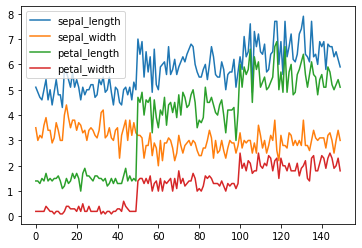

In [74]:
iris_data.plot()

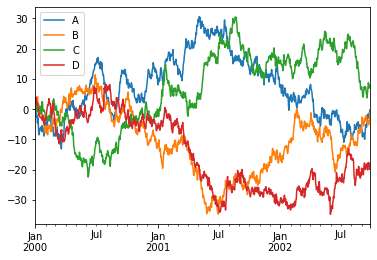

In [75]:
## Random walks
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.plot()
plt.show()

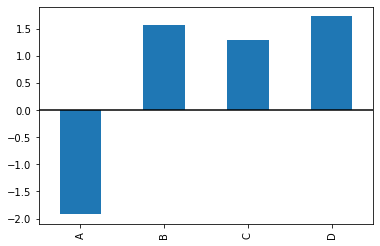

In [76]:
plt.figure()
df.iloc[5].plot(kind = "bar")
plt.axhline(0, color = 'k')

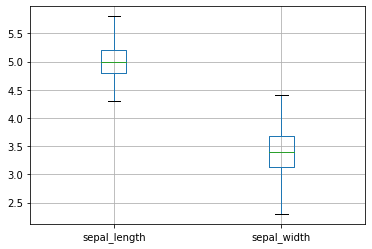

In [77]:
# iris.csv
ax = iris_data.groupby('species') \
        .get_group('setosa') \
        .boxplot(column=["sepal_length", "sepal_width"], return_type='axes')